<a href="https://colab.research.google.com/github/DarkSABBATH/AML_assignments/blob/main/Medical_Diagnosiss_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 1.IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Set style for all visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [13]:
# 2.DATA LOADING
print("Loading datasets...")
diabetes = pd.read_csv('/content/diabetes.csv')
heart = pd.read_csv('/content/heart.csv')  # Kaggle dataset
breast_cancer = pd.read_csv('/content/breast.csv')
parkinsons = pd.read_csv('/content/Parkinsson disease.csv')

print("\nDataset shapes:")
print(f"- Diabetes: {diabetes.shape}")
print(f"- Heart: {heart.shape}")
print(f"- Breast Cancer: {breast_cancer.shape}")
print(f"- Parkinsons: {parkinsons.shape}")

Loading datasets...

Dataset shapes:
- Diabetes: (768, 9)
- Heart: (1025, 14)
- Breast Cancer: (569, 33)
- Parkinsons: (195, 24)


In [21]:
# 3.DATA PREPROCESSING
print("\nPreprocessing datasets...")

# Diabetes
print("\n[Diabetes] Preprocessing...")
def preprocess_diabetes(df):
    # Handle 0 values in medical features
    cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    df[cols] = df[cols].replace(0, np.nan)
    df[cols] = df[cols].fillna(df[cols].median())
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    print(f"Processed shape: Features={X.shape}, Target={y.shape}")
    return X, y

X_diab, y_diab = preprocess_diabetes(diabetes)


Preprocessing datasets...

[Diabetes] Preprocessing...
Processed shape: Features=(768, 8), Target=(768,)


In [22]:
# Heart Disease (Kaggle version)
print("\n[Heart Disease] Preprocessing...")
def preprocess_heart(df):
    X = df.drop('target', axis=1)
    y = df['target']
    print(f"Processed shape: Features={X.shape}, Target={y.shape}")
    return X, y

X_heart, y_heart = preprocess_heart(heart)


[Heart Disease] Preprocessing...
Processed shape: Features=(1025, 13), Target=(1025,)


In [18]:
# Breast Cancer
print("\n[Breast Cancer] Preprocessing...")
def preprocess_breast_cancer(df):
    X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
    y = df['diagnosis'].map({'M':1, 'B':0})
    print(f"Processed shape: Features={X.shape}, Target={y.shape}")
    return X, y
X_bc, y_bc = preprocess_breast_cancer(breast_cancer)


[Breast Cancer] Preprocessing...
Processed shape: Features=(569, 30), Target=(569,)


In [19]:
# Parkinsons
print("\n[Parkinsons] Preprocessing...")
def preprocess_parkinsons(df):
    X = df.drop(['name', 'status'], axis=1)
    y = df['status']
    print(f"Processed shape: Features={X.shape}, Target={y.shape}")
    return X, y

X_park, y_park = preprocess_parkinsons(parkinsons)



[Parkinsons] Preprocessing...
Processed shape: Features=(195, 22), Target=(195,)


In [23]:
# 4.FEATURE SCALING
print("\nScaling features...")
scaler = StandardScaler()
X_diab = scaler.fit_transform(X_diab)
X_heart = scaler.fit_transform(X_heart)
X_bc = scaler.fit_transform(X_bc)
X_park = scaler.fit_transform(X_park)
print("Feature scaling completed!")



Scaling features...
Feature scaling completed!


In [24]:
# 5. TRAIN-TEST SPLIT
print("\nSplitting data into train/test sets...")
X_diab_train, X_diab_test, y_diab_train, y_diab_test = train_test_split(X_diab, y_diab, test_size=0.2, random_state=42)
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)
X_park_train, X_park_test, y_park_train, y_park_test = train_test_split(X_park, y_park, test_size=0.2, random_state=42)

print("\nTrain/test sizes:")
print(f"Diabetes - Train: {X_diab_train.shape[0]}, Test: {X_diab_test.shape[0]}")
print(f"Heart - Train: {X_heart_train.shape[0]}, Test: {X_heart_test.shape[0]}")
print(f"Breast Cancer - Train: {X_bc_train.shape[0]}, Test: {X_bc_test.shape[0]}")
print(f"Parkinsons - Train: {X_park_train.shape[0]}, Test: {X_park_test.shape[0]}")


Splitting data into train/test sets...

Train/test sizes:
Diabetes - Train: 614, Test: 154
Heart - Train: 820, Test: 205
Breast Cancer - Train: 455, Test: 114
Parkinsons - Train: 156, Test: 39


In [25]:
# 6. MODEL TRAINING
print("\nTraining models...")
diab_model = RandomForestClassifier(random_state=42)
heart_model = RandomForestClassifier(random_state=42)
bc_model = RandomForestClassifier(random_state=42)
park_model = RandomForestClassifier(random_state=42)

diab_model.fit(X_diab_train, y_diab_train)
heart_model.fit(X_heart_train, y_heart_train)
bc_model.fit(X_bc_train, y_bc_train)
park_model.fit(X_park_train, y_park_train)

print("All models trained successfully!")



Training models...
All models trained successfully!



Evaluating models with visualizations...

Evaluation for Diabetes:
Accuracy: 0.7402597402597403

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



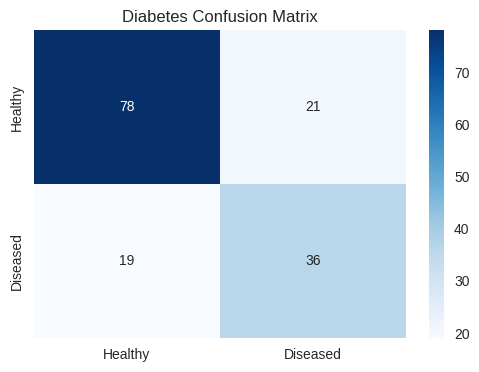

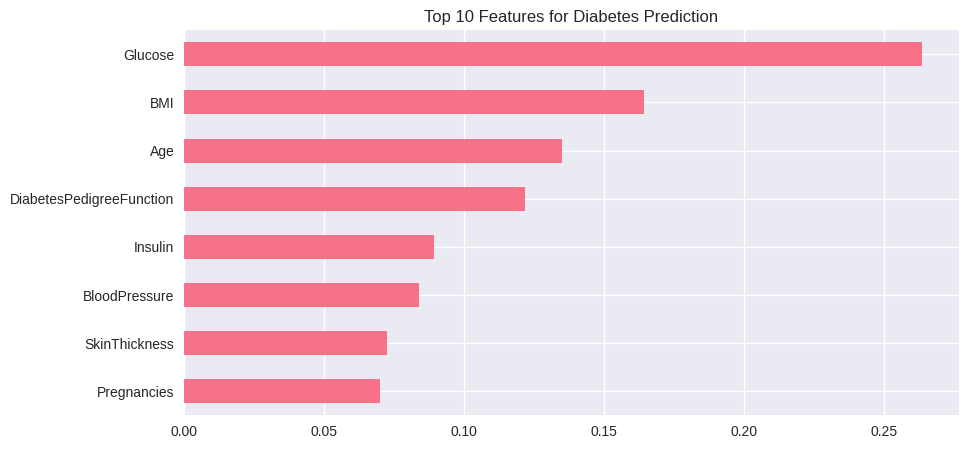


Evaluation for Heart Disease:
Accuracy: 0.9853658536585366

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



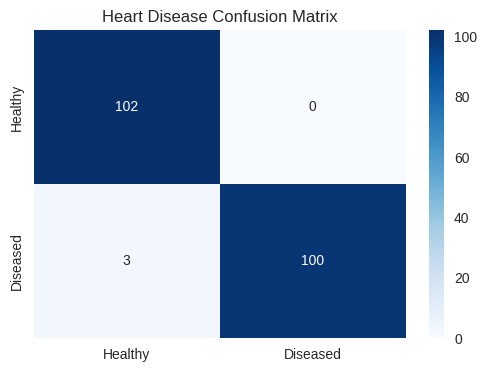

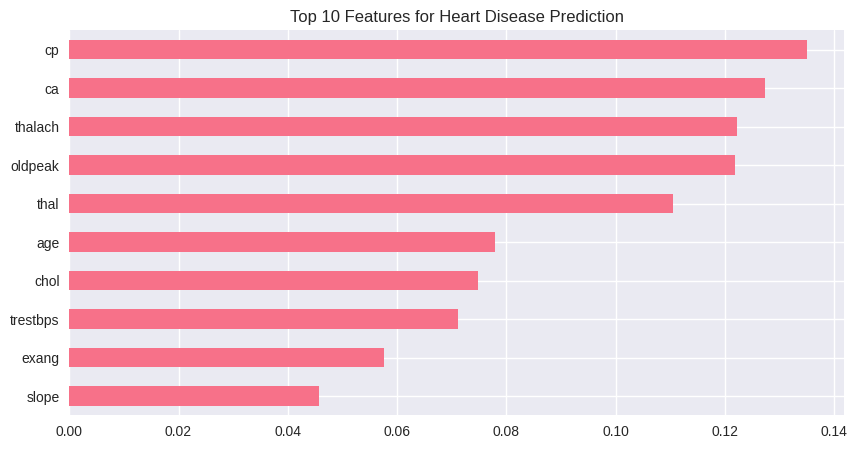


Evaluation for Breast Cancer:
Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



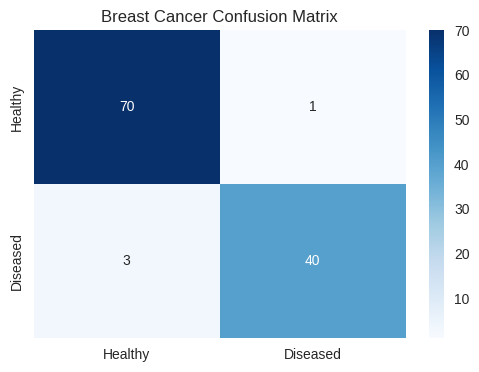

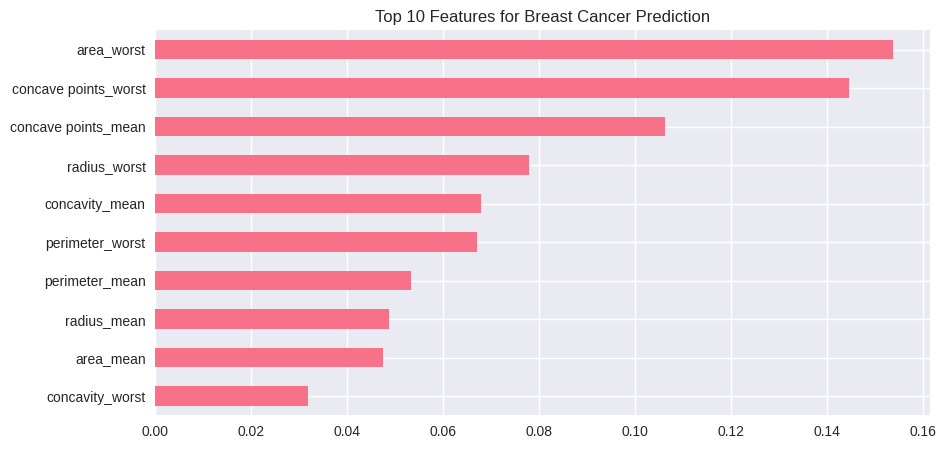


Evaluation for Parkinson's:
Accuracy: 0.9487179487179487

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



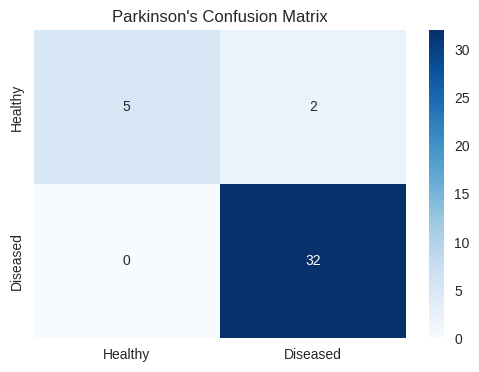

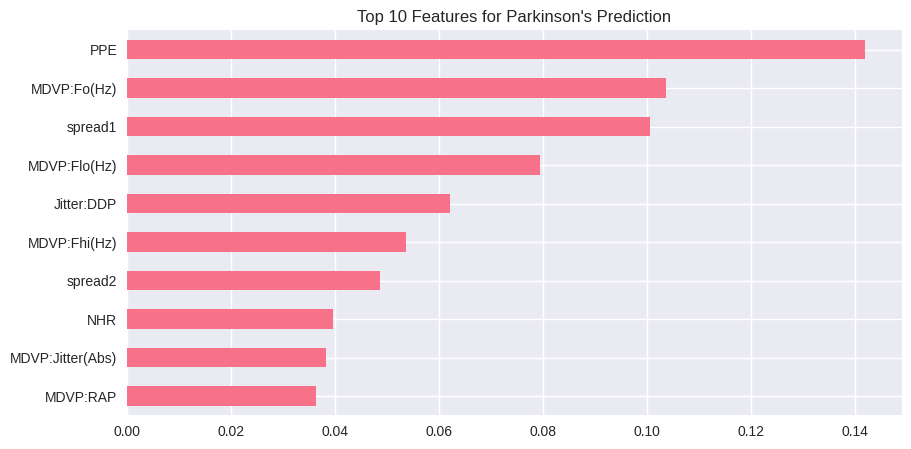

In [31]:

# 7. MODEL EVALUATION
def evaluate_model(model, X_test, y_test, disease_name, feature_names=None):
    y_pred = model.predict(X_test)

    print(f"\n{'='*50}")
    print(f"Evaluation for {disease_name}:")
    print(f"{'='*50}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualization 1: Confusion Matrix
    plt.figure(figsize=(6,4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Healthy', 'Diseased'],
                yticklabels=['Healthy', 'Diseased'])
    plt.title(f'{disease_name} Confusion Matrix')
    plt.show()

    # Visualization 2: Feature Importance
    if feature_names is not None:
        plt.figure(figsize=(10,5))
        importances = pd.Series(model.feature_importances_, index=feature_names)
        importances.nlargest(10).sort_values().plot(kind='barh')
        plt.title(f'Top 10 Features for {disease_name} Prediction')
        plt.show()

# Call evaluations with feature names
print("\nEvaluating models with visualizations...")
evaluate_model(diab_model, X_diab_test, y_diab_test, "Diabetes", diabetes.columns[:-1])
evaluate_model(heart_model, X_heart_test, y_heart_test, "Heart Disease", heart.columns[:-1])
evaluate_model(bc_model, X_bc_test, y_bc_test, "Breast Cancer", breast_cancer.drop(['id','diagnosis','Unnamed: 32'], axis=1).columns)
evaluate_model(park_model, X_park_test, y_park_test, "Parkinson's", parkinsons.drop(['name','status'], axis=1).columns)

In [35]:
# 8. PREDICTION SYSTEM
class MedicalDiagnosisPredictor:
    def __init__(self, models, scalers):
        self.models = models
        self.scalers = scalers

    def predict(self, disease_name, features):
        """Predict disease probability (0-1)"""
        if disease_name not in self.models or disease_name not in self.scalers:
            raise ValueError(f"Model or scaler for '{disease_name}' not found.")

        scaler = self.scalers[disease_name]
        features = scaler.transform([features])
        model = self.models[disease_name]
        return model.predict_proba(features)[0][1]

# Initialize predictor
models_dict = {
    'diabetes': diab_model,
    'heart_disease': heart_model,
    'breast_cancer': bc_model,
    'parkinsons': park_model
}

# Create and fit separate scalers for each dataset
scaler_diab = StandardScaler()
scaler_heart = StandardScaler()
scaler_bc = StandardScaler()
scaler_park = StandardScaler()

# Fit scalers on the training data for each disease
scaler_diab.fit(X_diab_train)
scaler_heart.fit(X_heart_train)
scaler_bc.fit(X_bc_train)
scaler_park.fit(X_park_train)


scalers_dict = {
    'diabetes': scaler_diab,
    'heart_disease': scaler_heart,
    'breast_cancer': scaler_bc,
    'parkinsons': scaler_park
}

predictor = MedicalDiagnosisPredictor(models_dict, scalers_dict)

In [37]:
# 9. EXAMPLE USAGE
print("\nMaking example predictions...")

# Example data (adjust values as needed)
# Ensure the number of features matches the training data for each disease
diab_example = [6, 148, 72, 35, 125, 33.6, 0.627, 50]  # Pregnancies, Glucose, etc. - 8 features
heart_example = [# 9. EXAMPLE USAGE (WITH VISUALIZATION)
# ======================
print("\nGenerating prediction visualization...")

# Prepare example cases
examples = {
    "Diabetes": diab_example,
    "Heart Disease": heart_example,
    "Breast Cancer": bc_example,
    "Parkinson's": park_example
}

# Create prediction probability plot
plt.figure(figsize=(10,5))
for disease, values in examples.items():
    proba = predictor.predict(disease.lower().replace(" ", "_"), values)
    plt.bar(disease, proba*100, alpha=0.6)

plt.axhline(50, color='red', linestyle='--')
plt.title('Disease Risk Prediction for Example Cases')
plt.ylabel('Risk Probability (%)')
plt.ylim(0,100)
plt.grid(axis='y', alpha=0.3)
plt.show()52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]  # Kaggle format - 13 features
bc_example = [17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189] # 30 features
park_example = [119.992, 157.302, 74.997, 0.00784, 0.00007, 0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654] # 22 features

print("\nExample Predictions:")
print(f"Diabetes Risk: {predictor.predict('diabetes', diab_example):.1%}")
print(f"Heart Disease Risk: {predictor.predict('heart_disease', heart_example):.1%}")
print(f"Breast Cancer Risk: {predictor.predict('breast_cancer', bc_example):.1%}")
print(f"Parkinson's Risk: {predictor.predict('parkinsons', park_example):.1%}")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-3045971915.py, line 9)

In [38]:
# 9. EXAMPLE USAGE
print("\nMaking example predictions...")

# Example data (adjust values as needed)
# Ensure the number of features matches the training data for each disease
diab_example = [6, 148, 72, 35, 125, 33.6, 0.627, 50]  # Pregnancies, Glucose, etc. - 8 features
heart_example = [52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]  # Kaggle format - 13 features
bc_example = [17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189] # 30 features
park_example = [119.992, 157.302, 74.997, 0.00784, 0.00007, 0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654] # 22 features

print("\nExample Predictions:")
print(f"Diabetes Risk: {predictor.predict('diabetes', diab_example):.1%}")
print(f"Heart Disease Risk: {predictor.predict('heart_disease', heart_example):.1%}")
print(f"Breast Cancer Risk: {predictor.predict('breast_cancer', bc_example):.1%}")
print(f"Parkinson's Risk: {predictor.predict('parkinsons', park_example):.1%}")


Making example predictions...

Example Predictions:
Diabetes Risk: 51.0%
Heart Disease Risk: 40.0%
Breast Cancer Risk: 95.0%
Parkinson's Risk: 56.0%



Generating prediction visualization...


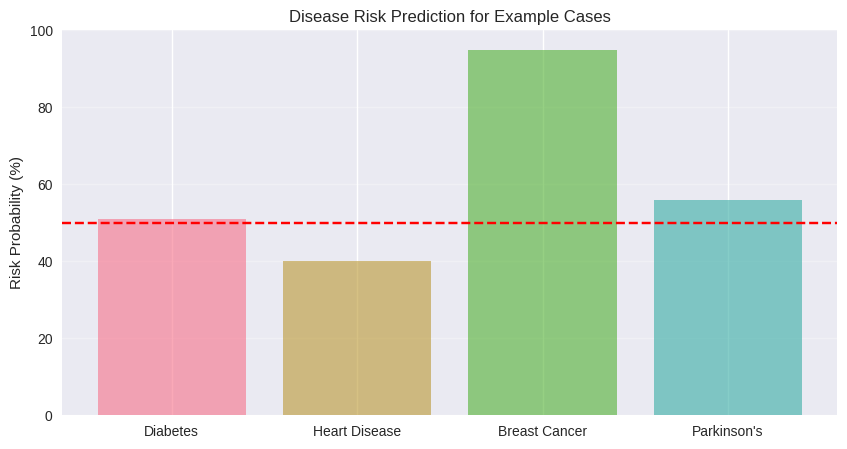

In [43]:
# 10. PREDICTION VISUALIZATION
print("\nGenerating prediction visualization...")

# Prepare example cases
examples = {
    "Diabetes": diab_example,
    "Heart Disease": heart_example,
    "Breast Cancer": bc_example,
    "Parkinson's": park_example
}

# Create prediction probability plot
plt.figure(figsize=(10,5))
for disease, values in examples.items():
    proba = predictor.predict(disease.lower().replace(" ", "_").replace("'", ""), values)
    plt.bar(disease, proba*100, alpha=0.6)

plt.axhline(50, color='red', linestyle='--')
plt.title('Disease Risk Prediction for Example Cases')
plt.ylabel('Risk Probability (%)')
plt.ylim(0,100)
plt.grid(axis='y', alpha=0.3)
plt.show()